In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd, numpy as np

import os
import math
import datetime as dt

# For Evalution

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building

import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Bidirectional
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint


# For PLotting

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
#maindf = pd.read_csv('/content/BTC_USD_Hrs.csv')
maindf = pd.read_csv('/content/gdrive/MyDrive/BTC_USD_hourly - Copy.csv')
maindf

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore,a,b
0,7/5/2018 18:00,6514.95,6553.00,6511.68,6548.23,1196.189885,1.530000e+12,7.815446e+06,6211,718.352312,4693562.988,0.0,NaN,NaN
1,7/5/2018 19:00,6548.88,6550.00,6520.99,6530.00,946.911989,1.530000e+12,6.185277e+06,5635,583.368542,3810992.607,0.0,NaN,NaN
2,7/5/2018 20:00,6530.00,6531.55,6480.45,6525.28,1673.240832,1.530000e+12,1.088657e+07,8175,874.482517,5690696.418,0.0,NaN,NaN
3,7/5/2018 21:00,6525.01,6533.63,6492.60,6494.99,1069.626991,1.530000e+12,6.960035e+06,6025,636.224944,4140197.425,0.0,NaN,NaN
4,7/5/2018 22:00,6494.99,6508.93,6456.13,6460.27,1365.982006,1.530000e+12,8.852903e+06,10355,658.392398,4266826.569,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34157,5/31/2022 19:00,4503.00,4619.47,4488.33,4619.43,43.862768,1.500000e+12,1.996608e+05,441,29.557031,134755.082,NaN,NaN,NaN
34158,5/31/2022 20:00,4503.00,4619.47,4488.33,4619.43,43.862768,1.500000e+12,1.996608e+05,441,29.557031,134755.082,NaN,NaN,NaN
34159,5/31/2022 21:00,4503.00,4619.47,4488.33,4619.43,43.862768,1.500000e+12,1.996608e+05,441,29.557031,134755.082,NaN,NaN,NaN
34160,5/31/2022 22:00,4503.00,4619.47,4488.33,4619.43,43.862768,1.500000e+12,1.996608e+05,441,29.557031,134755.082,NaN,NaN,NaN


In [ ]:
maindf['datetime'] = pd.to_datetime(maindf['datetime'], format='%m/%d/%Y %H:%M')

overall_train = maindf[['datetime','open','high','low','close']]

overall_train = maindf.loc[(maindf['datetime'] >= '2019-01-01 00:00:00') 
                          & (maindf['datetime'] <= '2021-12-31 23:00:00')]

overall_train

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore,a,b
4292,2019-01-01 00:00:00,3714.19,3731.19,3707.00,3716.70,887.101362,1.550000e+12,3.300500e+06,6190,468.473211,1.742964e+06,0.0,NaN,NaN
4293,2019-01-01 01:00:00,3716.98,3732.00,3696.14,3699.95,955.879034,1.550000e+12,3.545474e+06,5670,510.885391,1.895818e+06,0.0,NaN,NaN
4294,2019-01-01 02:00:00,3699.96,3717.11,3698.00,3713.07,534.113945,1.550000e+12,1.981238e+06,4008,290.434437,1.077294e+06,0.0,NaN,NaN
4295,2019-01-01 03:00:00,3713.07,3722.22,3706.88,3707.54,600.664642,1.550000e+12,2.231597e+06,4838,305.098579,1.133572e+06,0.0,NaN,NaN
4296,2019-01-01 04:00:00,3707.56,3725.00,3698.25,3717.00,654.277710,1.550000e+12,2.428995e+06,4802,352.182187,1.307746e+06,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30533,2021-12-31 19:00:00,46811.77,46916.63,46760.12,46813.20,562.889710,1.640000e+12,2.636326e+07,19882,248.282120,1.162938e+07,0.0,NaN,NaN
30534,2021-12-31 20:00:00,46813.21,46887.33,46591.23,46711.05,861.883890,1.640000e+12,4.027204e+07,23357,397.535630,1.857540e+07,0.0,NaN,NaN
30535,2021-12-31 21:00:00,46711.05,47555.55,46673.94,47192.55,1400.736420,1.640000e+12,6.618831e+07,41431,776.786320,3.669532e+07,0.0,NaN,NaN
30536,2021-12-31 22:00:00,47192.56,47324.42,46940.00,46979.62,613.977760,1.640000e+12,2.894149e+07,25196,299.440970,1.411607e+07,0.0,NaN,NaN


In [ ]:
names = cycle(['BTC Open Price','BTC Close Price','BTC High Price','BTC Low Price'])

fig = px.line(overall_train, x=overall_train.datetime, y=[overall_train['open'], overall_train['close'], 
                                          overall_train['high'], overall_train['low']],
             labels={'Date': 'Date','value':'Bitcoin Price'})
fig.update_layout(title_text='Bitcoin Price Analysis Chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(overall_train['close'].values.reshape(-1,1))

scaled_data.shape

(26246, 1)

In [ ]:
# we keep the training set as 80% and 20% validation set

training_size=int(len(scaled_data)*0.8)
val_size=len(scaled_data)-training_size
train_data,val_data=scaled_data[0:training_size,:],scaled_data[training_size:len(scaled_data),:1]
print("train_data: ", train_data.shape)
print("val_data: ", val_data.shape)

train_data:  (20996, 1)
val_data:  (5250, 1)


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, Window_Size):
  dataX, dataY = [], []
  for i in range(len(dataset) - Window_Size):
    dataX.append(dataset[i : (i + Window_Size), 0])
    dataY.append(dataset[i + Window_Size, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
"""

def TrModel(LSTM_units, Window_Size):

  model=Sequential()

  model.add(LSTM(LSTM_units,return_sequences=True,input_shape=(Window_Size,1), activation='relu'))
  #model.add(Dropout(0.4))

  model.add(LSTM(LSTM_units//2,return_sequences=True, activation='relu'))
  #model.add(Dropout(0.3))

  model.add(LSTM(LSTM_units//4, activation='relu'))
  #model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  return model


def CNN_LSTM2(LSTM_units, Window_Size):
  # Conv1D and LSTM
  model = Sequential()
  model.add(Conv1D(filters = LSTM_units*2, kernel_size = 7, padding = 'same', activation = 'relu', input_shape=(Window_Size,1)))
  model.add(MaxPooling1D(pool_size=2, strides=None, padding="valid"))
  model.add(LSTM(LSTM_units*2, return_sequences=True))
  model.add(LSTM(LSTM_units))
  model.add(Dense(LSTM_units//2, activation='relu'))
  model.add(Dense(1))
  
  return model

#!pip install attention
from attention import Attention

def CNN_LSTM_Attn2(LSTM_units, Window_Size):
  model = Sequential() 
  model.add(Conv1D(filters = LSTM_units*2, kernel_size = 7, padding = 'same', activation = 'relu', input_shape=(Window_Size,1)))             
  model.add(LSTM(units=LSTM_units, return_sequences=True)) #Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(units=LSTM_units//2,return_sequences=True))
  model.add(LSTM(units=LSTM_units//4,return_sequences=True))
  model.add(Dropout(0.2))
  model.add(Attention())
  model.add(Dense(1, activation='linear'))

  return model

"""


def CNN_LSTM(LSTM_units, Window_Size):
  # Conv1D and LSTM
  model = Sequential()
  model.add(Conv1D(filters = LSTM_units*2, kernel_size = 7, padding = 'same', input_shape=(Window_Size,1)))
  model.add(Activation('relu'))
  model.add(MaxPooling1D(pool_size=2, strides=None, padding="valid"))
  model.add(LSTM(LSTM_units))
  model.add(Dense(1))
  
  return model

In [ ]:
window_size = 5

for i in range(5):
  x_train, y_train=create_dataset(dataset=train_data, Window_Size=window_size)
  x_val, y_val=create_dataset(dataset=val_data, Window_Size=window_size)
  
  print(x_train.shape)
  print(y_train.shape)

  print(x_val.shape)
  print(y_val.shape)

  x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
  x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)

  print(x_train.shape)
  print(x_val.shape)

  Units = 8

  for j in range(5):

    if window_size == 10 and Units == 128:
      continue

    train_model = CNN_LSTM(LSTM_units=Units, Window_Size=window_size)

    print(train_model.summary())

    csv_log = tf.keras.callbacks.CSVLogger(f'/content/gdrive/MyDrive/Thesis_New/CNN_LSTM/Logs/CNN_LSTM_MaxPool_History_WS{window_size}_Units{Units}.csv', separator=',', append=True)

    CheckPoint = ModelCheckpoint(f'/content/gdrive/MyDrive/Thesis_New/CNN_LSTM/Models/CNN_LSTM_MaxPool_Model_WS{window_size}_Units{Units}.h5',
                                 monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch',save_weights_only=False)

    train_model.compile(loss="mean_squared_error",optimizer="adam")

    history = train_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,batch_size=64,callbacks=[csv_log, CheckPoint])

    #train_model.save(f'/content/gdrive/MyDrive/Thesis/CNN_LSTM/Models/CNN_LSTM_Model_WS{window_size}_Units{Neuron}.h5')

    Units = Units*2


  window_size = window_size + 5

(20991, 5)
(20991,)
(5245, 5)
(5245,)
(20991, 5, 1)
(5245, 5, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 16)             128       
                                                                 
 activation (Activation)     (None, 5, 16)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 16)            0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 937
Trainable params: 937
Non-trainable par

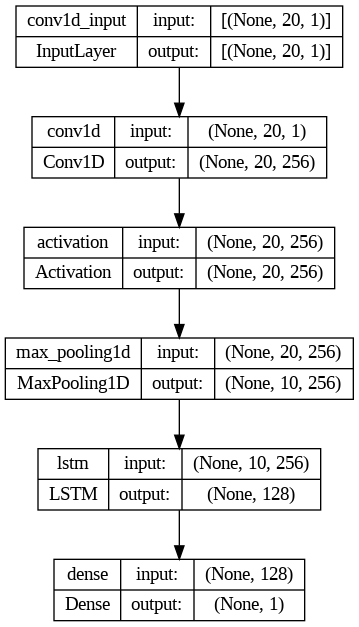

In [ ]:
from keras.utils import plot_model

mod = CNN_LSTM(128,20)
# Visualize the model architecture
plot_model(mod, show_shapes=True, show_layer_names=True, to_file='model.png')